# Feature Analysis of House Price Prediction Models

## Project Description

The purpose of this project is to analyze two existing models developed by other analyst; The models are a Linear Regression and a Random Forest Regressor. To try to explain the models it was used the coefficient analysis in case of the Linear Regression and feature importance in case of Random Forrest Regressor.

**Data Dictionary**

* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* LandContour: Flatness of the property
    * Lvl Near Flat/Level
    * Bnk Banked - Quick and significant rise from street grade to building
    * HLS Hillside - Significant slope from side to side
    * Low Depression
* OverallCond: Overall condition rating
    * 10 Very Excellent
    * 9 Excellent
    * 8 Very Good*
    * 7 Good
    * 6 Above Average
    * 5 Average
    * 4 Below Average
    * 3 Fair
    * 2 Poor
    * 1 Very Poor
* TotalBsmtSF: Total square feet of basement area
* CentralAir: Central air conditioning
    * N No
    * Y Yes
* GrLivArea: Above grade (ground) living area square feet
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

## Quick EDA

In order to have a better understanding of what is in the data, I'll perform a quick Exploratory Data Analysis

### Import Libraries

In [1]:
## import libraries
import joblib
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Load Data

In [2]:
## Load files

data = pd.read_csv('data/zillow_home_values-zipcode.csv')
data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,...,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107261.0,...,261945.0,267644.0,273946.0,280066.0,285121.0,288532.0,290458.0,291103.0,292081.0,292948.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222569.0,...,453150.0,464727.0,478369.0,489712.0,497173.0,499429.0,497572.0,498113.0,500187.0,503109.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90009.0,...,177319.0,179463.0,182812.0,186403.0,189836.0,192064.0,193760.0,195140.0,196787.0,198137.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,188096.0,...,570211.0,572145.0,573662.0,576469.0,578706.0,580834.0,581779.0,584566.0,588188.0,590722.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,275983.0,...,752025.0,757734.0,760336.0,766163.0,771443.0,776607.0,779281.0,782367.0,788211.0,793924.0


In [3]:
## saving columns to a list
id_columns = data.columns[:9]
id_columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName'],
      dtype='object')

In [4]:
## Melting data
data_melted = pd.melt(data,
                      id_vars=id_columns,
                      var_name='Date',
                      value_name='Home Value')
data_melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,Home Value
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,31012000,107261.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,31012000,222569.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,31012000,90009.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,31012000,188096.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,31012000,275983.0


In [5]:
## setting date as datetime and index
data_melted['Date'] = pd.to_datetime(data_melted['Date'], format='%d%m%Y')
data_melted.set_index('Date', inplace=True)
data_melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,,
2000-01-31,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107261.0
2000-01-31,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222569.0
2000-01-31,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90009.0
2000-01-31,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,188096.0
2000-01-31,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,275983.0


The Data is melted correctly, and set the data as index.

#### Filtering data to keep:
* States:  CA, WA, OR, AZ, NV
* Years  2010 - 2020.

In [6]:
## filtering states
states = ['CA', 'WA', 'OR', 'AZ', 'NV']
data_filtered = data_melted[data_melted['State'].isin(states)]

## filtering years
data_filtered = data_filtered.loc['2010':'2020']
display(data_filtered.head(), data_filtered.tail())

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,,
2010-01-31,95992,5,90011,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,209250.0
2010-01-31,96361,8,91331,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,257372.0
2010-01-31,96193,9,90650,zip,CA,CA,Norwalk,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,296430.0
2010-01-31,96083,12,90201,zip,CA,CA,Bell,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,271829.0
2010-01-31,96816,13,92335,zip,CA,CA,Fontana,"Riverside-San Bernardino-Ontario, CA",San Bernardino County,156704.0


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,,
2020-12-31,98502,30657,95950,zip,CA,CA,Grimes,NaN,Colusa County,220881.0
2020-12-31,95776,30657,89041,zip,NV,NV,Pahrump,"Pahrump, NV",Nye County,NaN
2020-12-31,99923,30657,98623,zip,WA,WA,White Salmon,NaN,Klickitat County,538209.0
2020-12-31,99927,30657,98628,zip,WA,WA,Goldendale,NaN,Klickitat County,112436.0
2020-12-31,99841,30657,98522,zip,WA,WA,Chehalis,"Centralia, WA",Lewis County,NaN


In [7]:
data_filtered['State'].unique()

array(['CA', 'WA', 'AZ', 'NV', 'OR'], dtype=object)

Data is correctly filtered.

#### Saving data to csv for further analysis

In [8]:
data_filtered.to_csv('data/data-for-tableau.csv')

#### Plotting data

In [9]:
## Resample the data to yearly frequency at the beginning of the calendar year

# B         business day frequency
# C         custom business day frequency (experimental)
# D         calendar day frequency
# W         weekly frequency
# M         month end frequency
# SM        semi-month end frequency (15th and end of month)
# BM        business month end frequency
# CBM       custom business month end frequency
# MS        month start frequency
# SMS       semi-month start frequency (1st and 15th)
# BMS       business month start frequency
# CBMS      custom business month start frequency
# Q         quarter end frequency
# BQ        business quarter endfrequency
# QS        quarter start frequency
# BQS       business quarter start frequency
# A         year end frequency
# BA, BY    business year end frequency
# AS, YS    year start frequency          #### <--- this is the one we are using
# BAS, BYS  business year start frequency
# BH        business hour frequency
# H         hourly frequency
# T, min    minutely frequency
# S         secondly frequency
# L, ms     milliseconds
# U, us     microseconds
# N         nanoseconds

In [10]:
ts = data_filtered.groupby('State')['Home Value'].resample('AS').mean()
ts

State  Date      
AZ     2010-01-01    169930.889076
       2011-01-01    152272.467002
       2012-01-01    159902.057789
       2013-01-01    183657.225403
       2014-01-01    198551.492521
       2015-01-01    206834.173937
       2016-01-01    217452.799614
       2017-01-01    229066.028099
       2018-01-01    244689.172792
       2019-01-01    257396.582183
       2020-01-01    278841.942045
CA     2010-01-01    415491.808100
       2011-01-01    388468.031550
       2012-01-01    388593.634299
       2013-01-01    454509.845597
       2014-01-01    505808.423831
       2015-01-01    535297.119658
       2016-01-01    569319.272450
       2017-01-01    601938.428066
       2018-01-01    646936.553061
       2019-01-01    649531.475923
       2020-01-01    675124.170696
NV     2010-01-01    189285.319787
       2011-01-01    168931.537037
       2012-01-01    165003.293888
       2013-01-01    199847.532946
       2014-01-01    228975.139535
       2015-01-01    247372.119614
  

In [11]:
from matplotlib.ticker import FuncFormatter

## defining functions tu use in the plot
def format_k(value, tick_number):
    if value >= 1000:
        return f'{int(value / 1_000)}K'
    else:
        return f'{float(value) / 1_000:.2f}K'

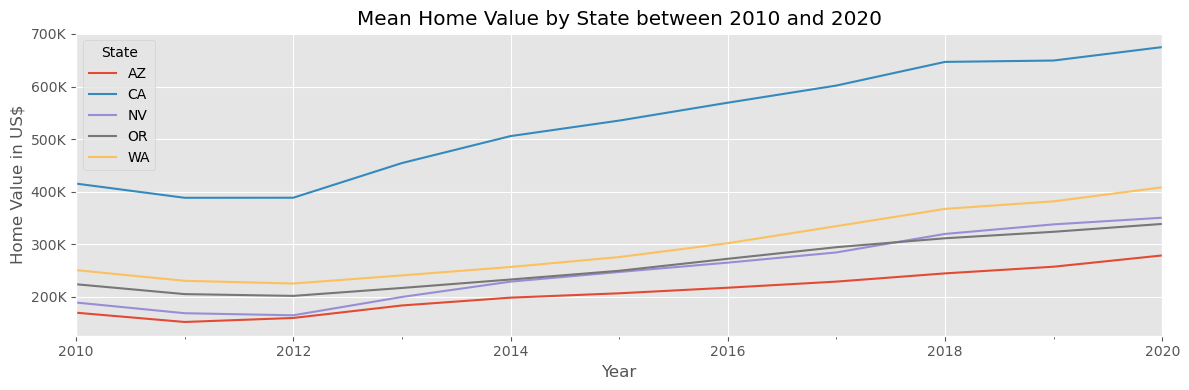

In [12]:
## ploting mean prices by state
ax = ts.unstack(level=0).plot(figsize=(12, 4))
ax.set_title('Mean Home Value by State between 2010 and 2020')
ax.set_ylabel('Home Value in US$')
ax.set_xlabel('Year')
ax.yaxis.set_major_formatter(FuncFormatter(format_k))
plt.tight_layout()
plt.savefig('img/mean_home_value_by_state_10-20.png', dpi=300)

We can see that the overall trend in Home Value is increasing, but we can see that the states of California and Washington are the ones that have the highest prices, and Arizona is the one that has the lowest prices.

## Model Analysis

Now, lets make the job, the models were provided through a packed joblib file, then it will be necessary to unpack the models and return them into their original condition. 

#### Loading Model and Data from Joblib


In [13]:
jl_model = joblib.load('data/saved_model.joblib')
jl_model.keys()

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor'])

In [14]:
## recovering model and data
# Preprocessor
preprocessor = jl_model['preprocessor']

# Training and Testing Data
X_train = jl_model['X_train']
X_test = jl_model['X_test']
y_train = jl_model['y_train']
y_test = jl_model['y_test']

# Models
lr_model = jl_model['LinearRegression']
rf_model = jl_model['RandomForestRegressor']

In [15]:
display(X_train.head(), y_train.head())

,Lot Area,Lot Frontage,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,TotRms AbvGrd,Land Contour
853,16269,NaN,5,907.0,Y,907,5,Lvl
1055,13891,107.0,5,1710.0,Y,1710,6,Lvl
2483,8900,NaN,4,1056.0,Y,1056,5,Lvl
2351,11475,85.0,6,713.0,Y,1552,6,Lvl
1700,13654,118.0,5,1704.0,Y,2758,9,Lvl


853     140000
1055    372402
2483    107000
2351    179900
1700    418000
Name: SalePrice, dtype: int64

Data has been loaded correctly.

As we see, the data contains missing values. The purpose of this assignment is only analize the models, then I'll assume that the preprocessor has already addressed this by imputing missing values.

#### Transforming the data using the preprocessor

In [16]:
feature_names = preprocessor.get_feature_names_out()
X_train_transformed = pd.DataFrame(preprocessor.transform(X_train),
                          columns=feature_names, index=X_train.index)
X_train_transformed.head()

,Lot Area,Lot Frontage,Overall Cond,Total Bsmt SF,Gr Liv Area,TotRms AbvGrd,Central Air_Y,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl
853,16269.0,69.230685,5.0,907.0,907.0,5.0,1.0,0.0,0.0,0.0,1.0
1055,13891.0,107.000000,5.0,1710.0,1710.0,6.0,1.0,0.0,0.0,0.0,1.0
2483,8900.0,69.230685,4.0,1056.0,1056.0,5.0,1.0,0.0,0.0,0.0,1.0
2351,11475.0,85.000000,6.0,713.0,1552.0,6.0,1.0,0.0,0.0,0.0,1.0
1700,13654.0,118.000000,5.0,1704.0,2758.0,9.0,1.0,0.0,0.0,0.0,1.0


In [17]:
X_test_transformed = pd.DataFrame(preprocessor.transform(X_test),
                         columns=feature_names, index=X_test.index)
X_test_transformed.head()

,Lot Area,Lot Frontage,Overall Cond,Total Bsmt SF,Gr Liv Area,TotRms AbvGrd,Central Air_Y,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl
343,13860.0,75.000000,7.0,1952.0,2704.0,9.0,1.0,0.0,0.0,0.0,1.0
1413,8405.0,50.000000,8.0,861.0,1367.0,7.0,1.0,0.0,0.0,0.0,1.0
2583,11310.0,75.000000,5.0,1367.0,1375.0,5.0,1.0,0.0,0.0,0.0,1.0
2020,6180.0,60.000000,5.0,960.0,986.0,5.0,0.0,0.0,0.0,0.0,1.0
348,8530.0,69.230685,5.0,384.0,1474.0,7.0,1.0,0.0,0.0,0.0,1.0


We see that the data has been transformed correctly, but it is not scaled. As it is not the purpose of the assignment to do this task, I'll continue with the data as it is.

### Linear Regression

#### Display Coefficients

In [18]:
## Setting decimals to 2
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

In [19]:
## Extracting Coefficients using .coef_ attribute
coefficients = pd.Series(lr_model.coef_, index=feature_names)

In [20]:
## Saving Intercept in a variable
intercept = lr_model.intercept_
coefficients.loc['Intercept'] = intercept

In [21]:
intercept

0.0

Interesting, the intercept is equal to zero.

In [22]:
## Displaying Coefficients
coefficients.sort_values(ascending=False)

Central Air_Y       31,927.22
Land Contour_HLS     4,243.63
Overall Cond         1,737.31
Lot Frontage           109.31
Gr Liv Area            101.28
Total Bsmt SF           59.75
Lot Area                 0.11
Intercept                0.00
TotRms AbvGrd       -6,299.91
Land Contour_Lvl   -42,264.19
Land Contour_Low   -43,310.96
Land Contour_Bnk   -72,620.47
dtype: float64

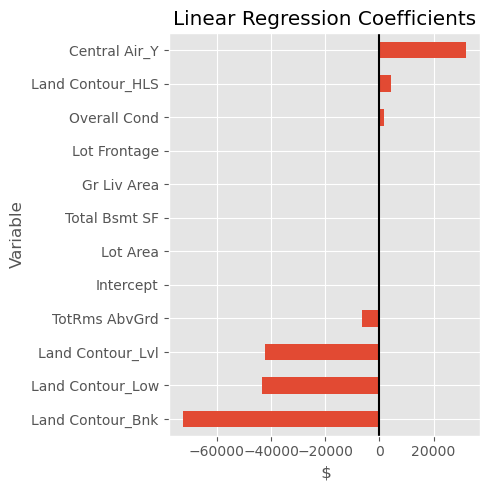

In [23]:
## Plotting Coefficients
ax = coefficients.sort_values(ascending=False).plot(kind='barh', figsize=(5, 5))
ax.axvline(0, color='k')
plt.gca().invert_yaxis() ## taken from https://stackoverflow.com/questions/34076177/matplotlib-horizontal-bar-chart-barh-is-upside-down
ax.set_title('Linear Regression Coefficients')
ax.set_xlabel(' $')
ax.set_ylabel('Variable')
plt.tight_layout()
plt.savefig('img/lr_coefficientes.png', dpi=300)

#### Interpreting Coefficients

**Top 3 Positive Coefficients**

* Central Air_Y: Having central air conditioning can add to the price 31,927.22 dollars.
* Land Contour_HLS: Having Significant slope from side to side can add 4,243.63 dollars to the price.
* Overall Cond: Higher the overall condition can add 1,737.31 dollars to the price.

**Top 3 Negative Coefficients**

* Land Contour_Lvl: Having Near Flat/Level can subtract -42,264.19 dollars to the price.
* Land Contour_Low: Having Low Depression can subtract -43,310.96 dollars to the price.
* Land Contour_Bnk: HAving Quick and significant rise from street grade to building can substract -72,620.47 to the price.

### Random Forest Regressor

Extracting the importance from the model.

In [24]:
## getting importances from the model
importances = pd.Series(rf_model.feature_importances_, index=feature_names)
importances.sort_values(ascending=False)

Gr Liv Area        0.44
Total Bsmt SF      0.36
Lot Area           0.06
Lot Frontage       0.05
Overall Cond       0.03
TotRms AbvGrd      0.03
Central Air_Y      0.01
Land Contour_HLS   0.01
Land Contour_Bnk   0.01
Land Contour_Lvl   0.00
Land Contour_Low   0.00
dtype: float64

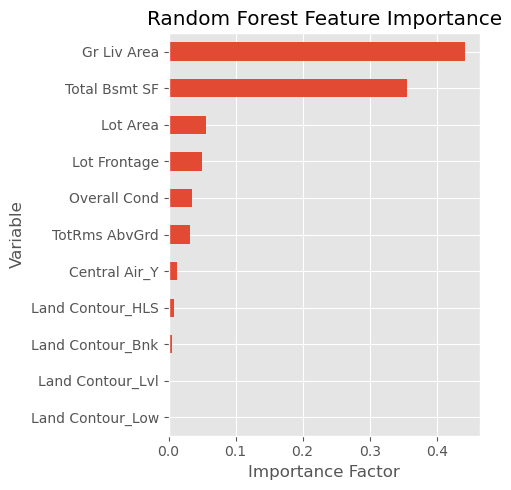

In [25]:
## Plotting importance
ax = importances.sort_values(ascending=False).plot(kind='barh', figsize=(5, 5))
plt.gca().invert_yaxis()
ax.set_title('Random Forest Feature Importance')
ax.set_xlabel('Importance Factor')
ax.set_ylabel('Variable')
plt.tight_layout()
plt.savefig('img/rf_feature_importance.png', dpi=300)

#### Interpreting Feature Importance

First of all, we can see that the most important feature is the GrLivArea, which is the above grade (ground) living area square feet. This is not surprising, as the bigger the house, the more expensive tend to be. Nonetheless we can see other features that have higher factor:

The 2 most important features are:
* Gr Liv Area: 0.44
* Total Bsmt SF:    0.36

The 4 following most important features are:
* Lot Area:         0.06
* Lot Frontage:     0.05
* Overall Cond:     0.03
* TotRms AbvGrd:    0.03

If we compare this features with the coefficients of the linear regression we can see different results here.

In linear regression the coefficient that push the price up is the Central Air_Y, but in the random forest regressor the most important feature is the GrLivArea, that have no important effect in linear regressionm model. The second most important feature is Total Bsmt SF, but in the linear regression the most important feature is Land Contour_HLS, which is not in the top 6 of the random forest regressor, and so on. This is because the random forest regressor is a non-linear model, and the linear regression is obviously a linear model. As it is not the purpose of this assignment to compare both models because, but the features analysis that we extract from the random forest regressor seems more reasonable about what you can see when you are buying a house.

By the way, the only feature that is in both most important features is Overall Cond.

#### Doing feature importance using SHAP

In [26]:
import shap
shap.initjs()

In [27]:
%%time
## creating shap values
# Subsetting the data
X_shap = shap.sample(X_train_transformed, nsamples=500, random_state=321)
y_shap = y_train.loc[X_shap.index]
## instantiating the explainer
explainer = shap.Explainer(rf_model)
shap_vals = explainer(X_shap, y_shap)

CPU times: total: 8.34 s
Wall time: 15.3 s


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


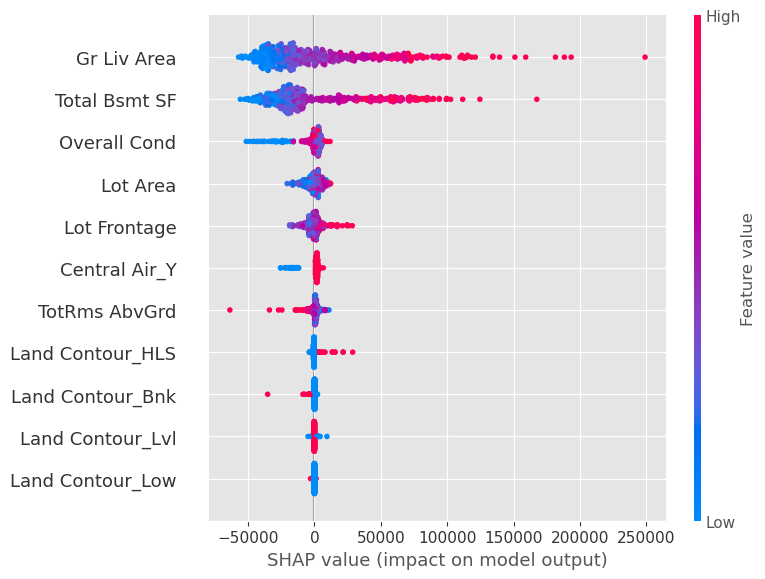

In [28]:
shap.summary_plot(shap_vals, plot_type ='dot', show=False)
plt.savefig("img/SHAP_feature_importance.png",dpi=300, bbox_inches='tight')

The top 6 most important features according to SHAP are:

* Gr Liv Area: this is the feature that have the most predictive power in the model. We can say that the greater the living area, the more expensive the house, and that's reasonable.

* Total Bsmt SF: We can say that the greater the basement area, the more expensive the house.

* Overall Cond: The red dots are concentrated around the 0 SHAP value, but we see a blue tail in the left side of the plot. This means that lower the overall conditions of the house have a negative impact in the price.

* Lot Area: We have a similar case that the Overall Cond,then we can conclude that the smaller the lot area, the lower the price.

* Lot Frontage: Red dots are in the right side of the plot, so the grater the lot frontage, the higher the price.

* Central Air_Y: Red dots are above the 0 SHAP Value, then we can say that having central air conditioning can add to the price.

## Tableau Analytics

Tableau Visualization can be found by clicking the link below:

[Visualizations: Home Prices](https://public.tableau.com/app/profile/israel.diaz/viz/shared/XPQ85743M)